# Visual Example of Maximum Likelihood Estimation

Maximum Likelihood Estimation (MLE) is fundamental to machine learning because it provides a principled framework for estimating the parameters of statistical models based on observed data.

# Step 1: Set Up the Environment
First, let's import the necessary libraries.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
%matplotlib inline


# Step 2: Generate Synthetic Data
We'll generate data from a normal distribution with a known mean and standard deviation.

In [2]:
# Set true parameters
true_mean = 5
true_std = 2

# Generate synthetic data
np.random.seed(0)  # For reproducibility
data = np.random.normal(true_mean, true_std, 100)

# Display the first 10 data points
print("First 10 data points:", data[:10])


First 10 data points: [8.52810469 5.80031442 6.95747597 9.4817864  8.73511598 3.04544424
 6.90017684 4.69728558 4.7935623  5.821197  ]


# Step 3: Define the Negative Log-Likelihood Function
The negative log-likelihood function measures how well a set of parameters explains the observed data.

In [3]:
def neg_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    # To prevent sigma from being zero or negative
    if sigma <= 0:
        return np.inf
    nll = -np.sum(norm.logpdf(data, loc=mu, scale=sigma))
    return nll


# Step 4: Perform MLE Optimization
We'll use scipy.optimize.minimize to find the parameters that minimize the negative log-likelihood.

In [4]:
# Initial guesses for mu and sigma
initial_guess = [0, 1]

# Perform optimization
result = minimize(
    neg_log_likelihood,
    initial_guess,
    args=(data,),
    bounds=[(None, None), (1e-6, None)]  # sigma must be positive
)

# Extract the estimated parameters
mle_mu, mle_sigma = result.x

print(f"Estimated Mean (MLE): {mle_mu:.4f}")
print(f"Estimated Std Dev (MLE): {mle_sigma:.4f}")


Estimated Mean (MLE): 5.1196
Estimated Std Dev (MLE): 2.0158


# Step 5: Visualize the Data and Estimated Distribution
We'll plot the histogram of the data and overlay the true and estimated probability density functions (PDFs).

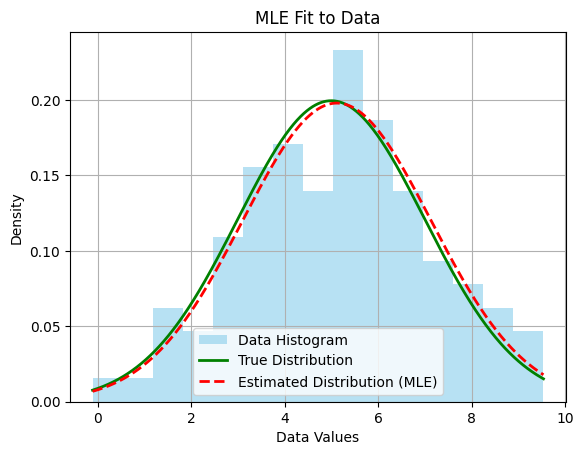

In [6]:
# Plot histogram of data
plt.hist(data, bins=15, density=True, alpha=0.6, color='skyblue', label='Data Histogram')

# Plot true distribution
x = np.linspace(min(data), max(data), 1000)
plt.plot(x, norm.pdf(x, true_mean, true_std), 'g', linewidth=2, label='True Distribution')

# Plot estimated distribution
plt.plot(x, norm.pdf(x, mle_mu, mle_sigma), 'r--', linewidth=2, label='Estimated Distribution (MLE)')

# Customize the plot
plt.title('MLE Fit to Data')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# Step 6: Visualize the Negative Log-Likelihood Function
We'll create a contour plot of the negative log-likelihood function over a range of
𝜇
μ and
𝜎
σ values.

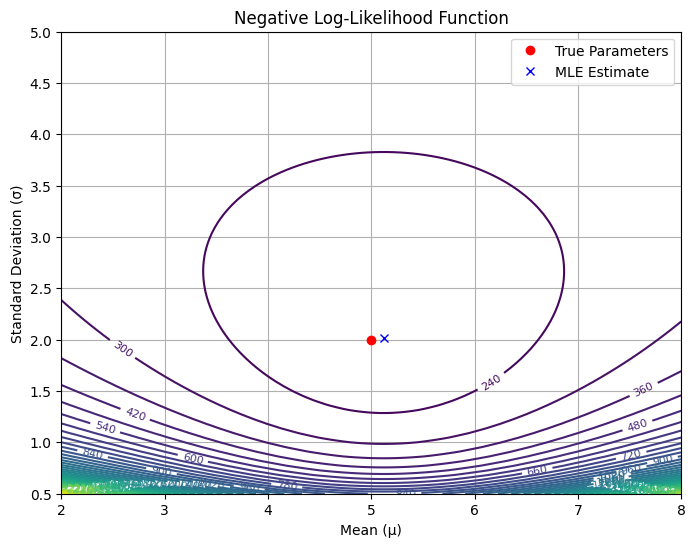

In [7]:
# Define ranges for mu and sigma
mu_range = np.linspace(true_mean - 3, true_mean + 3, 100)
sigma_range = np.linspace(0.5, 5, 100)

# Create meshgrid
Mu, Sigma = np.meshgrid(mu_range, sigma_range)

# Compute negative log-likelihood over the grid
NLL = np.array([
    neg_log_likelihood([mu, sigma], data)
    for mu, sigma in zip(np.ravel(Mu), np.ravel(Sigma))
])
NLL = NLL.reshape(Mu.shape)

# Plot contour of negative log-likelihood
plt.figure(figsize=(8, 6))
cs = plt.contour(Mu, Sigma, NLL, levels=50, cmap='viridis')
plt.clabel(cs, inline=True, fontsize=8)
plt.plot(true_mean, true_std, 'ro', label='True Parameters')
plt.plot(mle_mu, mle_sigma, 'bx', label='MLE Estimate')
plt.xlabel('Mean (μ)')
plt.ylabel('Standard Deviation (σ)')
plt.title('Negative Log-Likelihood Function')
plt.legend()
plt.grid(True)
plt.show()


# Explanation
* Data Generation: We generated 100 data points from a normal distribution with a mean of 5 and a standard deviation of 2.
* Negative Log-Likelihood: The function neg_log_likelihood calculates the negative log-likelihood for given
𝜇 and
σ.
* Optimization: Using scipy.optimize.minimize, we found the parameter values that minimize the negative log-likelihood.
* Visualization:
  * Histogram and PDFs: The histogram shows the distribution of the data. The green line represents the true distribution, and the red dashed line represents the estimated distribution using MLE.
  * Contour Plot: The contour plot visualizes the negative log-likelihood function over a grid of
𝜇 and
σ values. The minimum point corresponds to the MLE estimates.